In [1]:
import pandas as pd
data= pd.read_csv("sampled_df.csv")
data.head(10)

,title,year,director,actors,rating,runtime,genre,release_date,plot_summary,words_movies,headline,category,short_description,authors,date,words_news
0,The SpongeBob Movie: Sponge Out of Water,2015,"Directors:Paul Tibbitt, Mike Mitchell","Tom Kenny, Antonio Banderas, Bill Fagerbakke, ...",6.0,92,Animation,2/6/2015,When a diabolical pirate above the sea steals ...,diabolical pirate sea steals secret formula ne...,Fighting the New Stupidity,"Keith M. Parsons, ContributorPhilosopher, hist...",Vaccines are a great triumph of the human inte...,Vaccines are a great triumph of the human inte...,2/6/2015,Vaccines great triumph human intellect ancient...
1,Entourage,2015,Doug Ellin,"Adrian Grenier, Kevin Connolly, Jerry Ferrara,...",6.5,104,Comedy,7/18/2015,Film star Vince Chase navigates the vapid terr...,navigates vapid terrain close circle friends t...,Harper Lee's 'Watchmen' Infused With Religious...,"Cathy Lynn Grossman, Religion News Service",(RNS) Harper Lee’s “new” book “Go Set a Watchm...,(RNS) Harper Lee’s “new” book “Go Set a Watchm...,7/18/2015,new book Go infused religious life Christian m...
2,Baywatch,2017,Seth Gordon,"Dwayne Johnson, Zac Efron, Alexandra Daddario,...",5.5,116,Action,5/25/2017,Devoted lifeguard Mitch Buchannon butts heads ...,Devoted lifeguard butts heads brash new recrui...,39 Tweets That Capture How Much Parents Love Wine,Caroline Bologna,Happy National Wine Day!,Happy National Wine Day!,5/25/2017,Happy
3,Mute,2018,Duncan Jones,"Alexander Skarsgård, Paul Rudd, Justin Theroux...",5.4,126,Mystery,2/23/2018,A mute bartender goes up against his city's ga...,mute bartender goes city gangsters effort find...,"Despite Attacking Renewables, Trump Team Says ...",Chris D'Angelo,"""As long as it’s made in America, I’m good wit...","""As long as it’s made in America, I’m good wit...",2/23/2018,As long made ’m good said
4,Honeymoon,2014,Leigh Janiak,"Rose Leslie, Harry Treadaway, Ben Huber, Hanna...",5.7,87,Drama,9/12/2014,A newlywed couple finds their lake-country hon...,newlywed couple finds lake country honeymoon d...,"Golf Teacher Admits To Molesting Kids, Trying ...",Ed Mazza,NaN,NaN,9/12/2014,NaN
5,Split,2016,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",7.3,117 min,"Horror, Thriller",1/20/2017,Three girls are kidnapped by a man with a diag...,girls kidnapped man diagnosed distinct persona...,Newspaper Front Pages Usher In Uncertainty Of ...,Willa Frej,"""We have no idea what this guy's gonna do,"" on...","""We have no idea what this guy's gonna do,"" on...",1/20/2017,have idea guy gon do cover reads
6,Scooby-Doo! WrestleMania Mystery,2014,"Brandon Vietti, Seung-goo Jo, Young Won Jung, ...","Frank Welker, Mindy Cohn, Grey Griffin, Matthe...",7.4,84 min,"Animation, Comedy, Family, Mystery",3/25/2014,Shaggy and Scooby win tickets for a WWE City t...,win tickets trip go there attacked huge monste...,Gillian Georges: A Bar Star on the Rise,"Jose Martinez, Contributor\nJose Martinez is a...",Determined to eventually open her own restaura...,Determined to eventually open her own restaura...,3/25/2014,Determined eventually open own restaurant mayb...
7,Scooby-Doo! Music of the Vampire,2012,David Block,"Frank Welker, Matthew Lillard, Grey Griffin, M...",7.8,79 min,"Family, Animation, Mystery, Adventure, Comedy,...",3/13/2012,When Daphne becomes the star of a vampire film...,becomes star vampire film production thrown ch...,Do You Eat When You're Bored?,"Irene Rubaum-Keller, Contributor\nAuthor, Mili...","If you eat when you're bored, you are not alon...","If you eat when you're bored, you are not alon...",3/13/2012,eat bored alone Eating fun pleasure do procras...
8,The Rewrite,2014,Marc Lawrence,"Hugh Grant, Whit Baldwin, Vanessa Wasche",6.0,107 min,"Romance, Comedy",2/13/2015,An Oscar-winning writer in a slump leaves Holl...,Oscar winning writer slump leaves teach screen...,"Health Is Progress, Not Perfection","Erin Bahadur, Contributorrecovering addict, cr...","For me, health means much more

In [3]:
import pandas as pd

# Convert the 'release_date' column to a datetime object
data['release_date'] = pd.to_datetime(data['release_date'], format='%m/%d/%Y')

# Extract the month and create a new 'month' column in words
data['month'] = data['release_date'].dt.strftime('%B')

# Display the DataFrame with the new 'month' column in words
print(data[['release_date', 'month']])

      release_date      month
0       2015-02-06   February
1       2015-07-18       July
2       2017-05-25        May
3       2018-02-23   February
4       2014-09-12  September
...            ...        ...
19995   2018-08-31     August
19996   2017-10-24    October
19997   2016-11-04   November
19998   2018-03-29      March
19999   2013-05-23        May

[20000 rows x 2 columns]


In [4]:
import pandas as pd

# Split 'data' into two DataFrames: df1 and df2
df1 = data[['words_movies', 'genre']].copy()
df2 = data[['words_movies', 'month']].copy()

# Process 'genre' column in df1 to keep only the first value
df1['genre'] = df1['genre'].str.split(',').str[0]

# Display the resulting DataFrames
print("df1:")
print(df1)

print("\ndf2:")
print(df2)


df1:
                                            words_movies      genre
0      diabolical pirate sea steals secret formula ne...  Animation
1      navigates vapid terrain close circle friends t...     Comedy
2      Devoted lifeguard butts heads brash new recrui...     Action
3      mute bartender goes city gangsters effort find...    Mystery
4      newlywed couple finds lake country honeymoon d...      Drama
...                                                  ...        ...
19995  small town menfolk live fear evil spirit named...     Comedy
19996  video artist looking work drives remote house ...      Crime
19997  served refuses kill people becomes first man A...  Biography
19998  creator virtual reality called dies makes post...     Action
19999  own kidnapped angry gangster track escaped pri...     Comedy

[20000 rows x 2 columns]

df2:
                                            words_movies      month
0      diabolical pirate sea steals secret formula ne...   February
1      navi

In [11]:
df3 = data[['words_news', 'month']].copy()
df3.dropna(subset=['words_news'], inplace=True)

df4 = data[['words_news', 'genre']].copy()
df4.dropna(subset=['words_news'], inplace=True)

# Process 'genre' column in df1 to keep only the first value
df4['genre'] = df4['genre'].str.split(',').str[0]

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df1['words_movies'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df1['genre'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.97375
Classification Report:
                  precision    recall  f1-score   support

         Action       0.97      0.98      0.98      1084
      Adventure       0.99      0.97      0.98       199
      Animation       0.98      0.96      0.97       256
      Biography       0.97      0.98      0.97       245
         Comedy       0.96      0.99      0.97       679
          Crime       0.99      0.97      0.98       210
    Documentary       1.00      0.95      0.98        43
          Drama       0.98      0.98      0.98       667
         Family       0.95      0.98      0.97        64
        Fantasy       1.00      0.96      0.98        49
        History       1.00      0.86      0.92         7
         Horror       0.99      0.96      0.97       234
          Music       1.00      0.80      0.89        10
        Mystery       1.00      1.00      1.00        21
        Romance       0.82      0.79      0.81        29
Science Fiction       0.98      0.92      0.9

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with Count Vectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df1['words_movies'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df1['genre'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.972
Classification Report:
                  precision    recall  f1-score   support

         Action       0.98      0.98      0.98      1084
      Adventure       0.97      0.97      0.97       199
      Animation       0.99      0.96      0.97       256
      Biography       0.95      0.98      0.96       245
         Comedy       0.97      0.98      0.98       679
          Crime       0.97      0.97      0.97       210
    Documentary       0.98      0.95      0.96        43
          Drama       0.97      0.98      0.97       667
         Family       0.95      0.98      0.97        64
        Fantasy       0.92      0.96      0.94        49
        History       1.00      0.86      0.92         7
         Horror       1.00      0.95      0.97       234
          Music       0.89      0.80      0.84        10
        Mystery       0.95      1.00      0.98        21
        Romance       0.85      0.79      0.82        29
Science Fiction       1.00      0.92      0.96 

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df2['words_movies'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df2['month'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9725
Classification Report:
               precision    recall  f1-score   support

       April       0.97      0.98      0.98       347
      August       0.98      0.97      0.97       354
    December       0.97      0.97      0.97       277
    February       0.98      0.98      0.98       350
     January       0.96      0.99      0.97       345
        July       0.96      0.96      0.96       342
        June       0.97      0.97      0.97       308
       March       0.97      0.98      0.98       341
         May       0.96      0.98      0.97       267
    November       0.97      0.98      0.97       301
     October       0.99      0.96      0.97       410
   September       0.97      0.97      0.97       358

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with Count Vectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df2['words_movies'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df2['month'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9715
Classification Report:
               precision    recall  f1-score   support

       April       0.98      0.98      0.98       347
      August       0.95      0.96      0.96       354
    December       0.98      0.97      0.98       277
    February       0.97      0.98      0.98       350
     January       0.99      0.98      0.99       345
        July       0.98      0.96      0.97       342
        June       0.97      0.97      0.97       308
       March       0.95      0.97      0.96       341
         May       0.96      0.98      0.97       267
    November       0.95      0.98      0.97       301
     October       0.98      0.96      0.97       410
   September       0.99      0.97      0.98       358

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df3['words_news'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df3['month'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.2689994532531438
Classification Report:
               precision    recall  f1-score   support

       April       0.26      0.25      0.25       300
      August       0.30      0.26      0.28       325
    December       0.22      0.33      0.26       272
    February       0.26      0.29      0.27       338
     January       0.24      0.23      0.23       285
        July       0.24      0.22      0.23       279
        June       0.28      0.25      0.26       283
       March       0.26      0.28      0.27       329
         May       0.27      0.21      0.24       268
    November       0.36      0.29      0.32       286
     October       0.29      0.29      0.29       361
   September       0.30      0.30      0.30       332

    accuracy                           0.27      3658
   macro avg       0.27      0.27      0.27      3658
weighted avg       0.27      0.27      0.27      3658



In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with Count Vectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df3['words_news'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df3['month'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.2711864406779661
Classification Report:
               precision    recall  f1-score   support

       April       0.26      0.26      0.26       300
      August       0.22      0.26      0.24       325
    December       0.24      0.33      0.28       272
    February       0.32      0.27      0.29       338
     January       0.23      0.23      0.23       285
        July       0.22      0.22      0.22       279
        June       0.28      0.24      0.26       283
       March       0.27      0.29      0.28       329
         May       0.31      0.21      0.25       268
    November       0.30      0.29      0.29       286
     October       0.28      0.32      0.30       361
   September       0.35      0.31      0.33       332

    accuracy                           0.27      3658
   macro avg       0.27      0.27      0.27      3658
weighted avg       0.28      0.27      0.27      3658



In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df4['words_news'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df4['genre'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.17605248769819573
Classification Report:
                  precision    recall  f1-score   support

         Action       0.27      0.36      0.31      1024
      Adventure       0.04      0.03      0.03       196
      Animation       0.04      0.04      0.04       223
      Biography       0.07      0.06      0.07       214
         Comedy       0.17      0.18      0.17       607
          Crime       0.02      0.01      0.01       184
    Documentary       0.07      0.07      0.07        30
          Drama       0.19      0.20      0.19       615
         Family       0.02      0.01      0.02        75
        Fantasy       0.00      0.00      0.00        36
        History       0.00      0.00      0.00         4
         Horror       0.06      0.04      0.05       202
          Music       0.10      0.09      0.10        11
        Mystery       0.00      0.00      0.00        23
        Romance       0.00      0.00      0.00        31
Science Fiction       0.05      0

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with Count Vectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df4['words_news'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df4['genre'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.17140513942044833
Classification Report:
                  precision    recall  f1-score   support

         Action       0.27      0.35      0.30      1024
      Adventure       0.04      0.03      0.03       196
      Animation       0.07      0.08      0.07       223
      Biography       0.06      0.05      0.05       214
         Comedy       0.17      0.17      0.17       607
          Crime       0.02      0.02      0.02       184
    Documentary       0.06      0.03      0.04        30
          Drama       0.16      0.18      0.17       615
         Family       0.05      0.01      0.02        75
        Fantasy       0.00      0.00      0.00        36
        History       0.00      0.00      0.00         4
         Horror       0.05      0.04      0.05       202
          Music       0.00      0.00      0.00        11
        Mystery       0.00      0.00      0.00        23
        Romance       0.00      0.00      0.00        31
Science Fiction       0.06      0

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with Count Vectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df2['words_movies'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df2['month'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees) with different criteria
# Gini impurity
gini_classifier = DecisionTreeClassifier(criterion="gini")
gini_classifier.fit(X_train, y_train)

# Entropy
entropy_classifier = DecisionTreeClassifier(criterion="entropy")
entropy_classifier.fit(X_train, y_train)

# Information Gain
information_gain_classifier = DecisionTreeClassifier(criterion="gini")
information_gain_classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions with each classifier
gini_y_pred = gini_classifier.predict(X_test)
entropy_y_pred = entropy_classifier.predict(X_test)
information_gain_y_pred = information_gain_classifier.predict(X_test)

# Calculate accuracy for each classifier
gini_accuracy = accuracy_score(y_test, gini_y_pred)
entropy_accuracy = accuracy_score(y_test, entropy_y_pred)
information_gain_accuracy = accuracy_score(y_test, information_gain_y_pred)

print("Gini Accuracy:", gini_accuracy)
print("Entropy Accuracy:", entropy_accuracy)
print("Information Gain Accuracy:", information_gain_accuracy)

# Generate a classification report for each classifier if needed


Gini Accuracy: 0.972
Entropy Accuracy: 0.97225
Information Gain Accuracy: 0.97175


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Text Vectorization with Count Vectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df2['words_movies'])

# Step 2: Normalization (not required for Decision Trees)
# No need for normalization when using Decision Trees

# Step 3: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df2['month'], test_size=0.2, random_state=42)

# Step 4: Model Training (Decision Trees) with Gini Impurity
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train, y_train)

# Step 5: Model Training (Decision Trees) with Entropy
classifier_entropy = DecisionTreeClassifier(criterion="entropy")
classifier_entropy.fit(X_train, y_train)

# Evaluate the models

# Model with Gini Impurity
y_pred_gini = classifier_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Model with Entropy
y_pred_entropy = classifier_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print results
print("Accuracy (Gini Impurity):", accuracy_gini)
print("Accuracy (Entropy):", accuracy_entropy)

# Generate classification reports for both models
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

print("Classification Report (Gini Impurity):\n", report_gini)
print("Classification Report (Entropy):\n", report_entropy)


Accuracy (Gini Impurity): 0.97225
Accuracy (Entropy): 0.9725
Classification Report (Gini Impurity):
               precision    recall  f1-score   support

       April       0.97      0.98      0.98       347
      August       0.96      0.96      0.96       354
    December       0.98      0.97      0.97       277
    February       0.98      0.99      0.98       350
     January       0.99      0.98      0.99       345
        July       0.97      0.96      0.97       342
        June       0.97      0.97      0.97       308
       March       0.95      0.97      0.96       341
         May       0.96      0.98      0.97       267
    November       0.95      0.98      0.96       301
     October       0.99      0.95      0.97       410
   September       0.99      0.97      0.98       358

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

Classification Report (Entropy):

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a list to store the results
results = []

# Define different parameter values
parameters = [{"max_depth": None, "random_state":42},
              {"max_depth": 10, "random_state": 123},
              {"max_depth": 15, "random_state": 456}]

for params in parameters:
    # Step 1: Text Vectorization with TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    X = tfidf_vectorizer.fit_transform(df1['words_movies'])

    # Step 2: Normalization (not required for Decision Trees)
    # No need for normalization when using Decision Trees

    # Step 3: Data Split
    X_train, X_test, y_train, y_test = train_test_split(X, df1['genre'], test_size=0.2, random_state=42)

    # Step 4: Model Training (Decision Trees) with different parameters
    classifier = DecisionTreeClassifier(**params)
    classifier.fit(X_train, y_train)

    # Step 5: Model Evaluation
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Append results to the list
    results.append({"Parameters": params, "Accuracy": accuracy, "Classification Report": report})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

,Parameters,Accuracy,Classification Report
0,"{'max_depth': None, 'random_state': 42}",0.97325,precision recall f1-score...
1,"{'max_depth': 10, 'random_state': 123}",0.38100,precision recall f1-score...
2,"{'max_depth': 15, 'random_state': 456}",0.43800,precision recall f1-score...


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


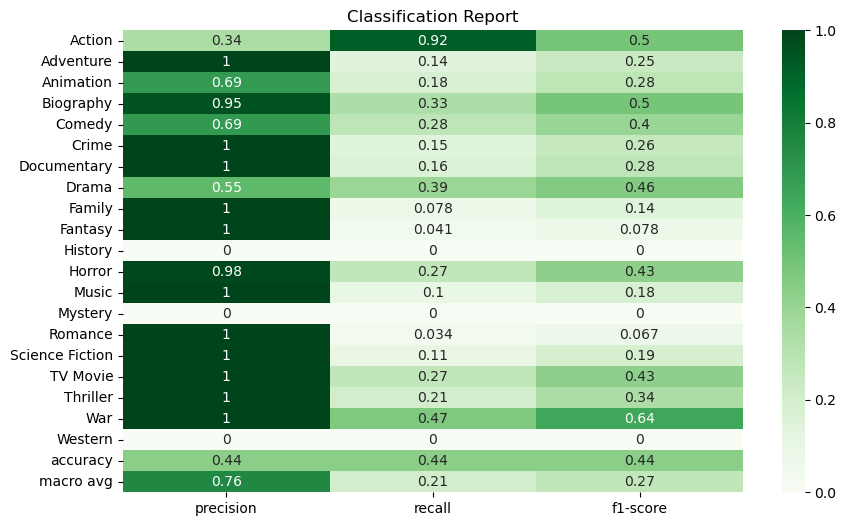

In [35]:
#pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Greens")
plt.title("Classification Report")
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[996   0   3   0   9   0   0  76   0   0   0   0   0   0   0   0   0   0
    0   0]
 [148  28   0   0  16   0   0   7   0   0   0   0   0   0   0   0   0   0
    0   0]
 [198   0  46   0   3   0   0   8   0   0   0   1   0   0   0   0   0   0
    0   0]
 [143   0   0  82   2   0   0  18   0   0   0   0   0   0   0   0   0   0
    0   0]
 [436   0   7   2 189   0   0  45   0   0   0   0   0   0   0   0   0   0
    0   0]
 [156   0   1   2   9  31   0  11   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 32   0   0   0   0   0   7   4   0   0   0   0   0   0   0   0   0   0
    0   0]
 [374   0   5   0  27   0   0 261   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 52   0   5   0   0   0   0   2   5   0   0   0   0   0   0   0   0   0
    0   0]
 [ 42   0   0   0   1   0   0   4   0   2   0   0   0   0   0   0   0   0
    0   0]
 [  3   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0
    0   0]
 [142   0   0   0   9   0   0  19   0   0   0  

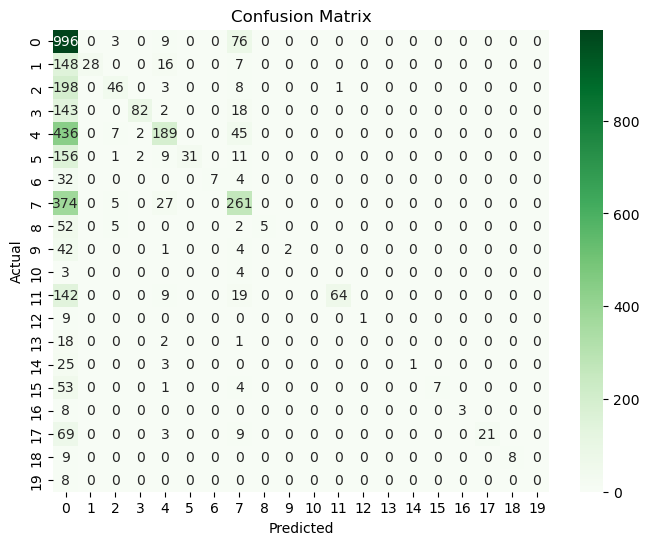

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a list to store the results
results = []

# Define different parameter values
parameters = [{"max_depth": None, "random_state": 42},
              {"max_depth": 10, "random_state": 123},
              {"max_depth": 15, "random_state": 456}]

for params in parameters:
    # Step 1: Text Vectorization with TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    X = tfidf_vectorizer.fit_transform(df2['words_movies'])

    # Step 2: Normalization (not required for Decision Trees)
    # No need for normalization when using Decision Trees

    # Step 3: Data Split
    X_train, X_test, y_train, y_test = train_test_split(X, df2['month'], test_size=0.2, random_state=42)

    # Step 4: Model Training (Decision Trees) with different parameters
    classifier = DecisionTreeClassifier(**params)
    classifier.fit(X_train, y_train)

    # Step 5: Model Evaluation
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Append results to the list
    results.append({"Parameters": params, "Accuracy": accuracy, "Classification Report": report})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

,Parameters,Accuracy,Classification Report
0,"{'max_depth': None, 'random_state': 42}",0.97350,precision recall f1-score ...
1,"{'max_depth': 10, 'random_state': 123}",0.12775,precision recall f1-score ...
2,"{'max_depth': 15, 'random_state': 456}",0.13650,precision recall f1-score ...


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


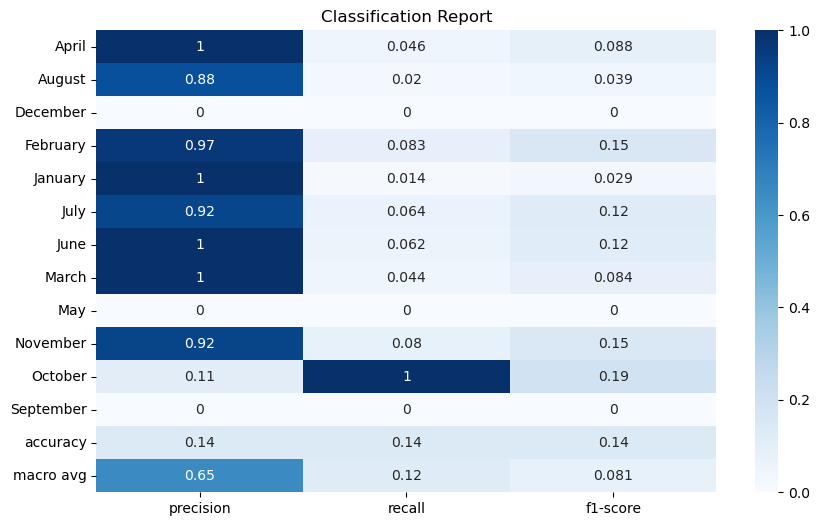

In [50]:
#pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title("Classification Report")
plt.show()

Confusion Matrix:
[[ 16   0   0   0   0   1   0   0   0   0 330   0]
 [  0   7   0   0   0   1   0   0   0   0 346   0]
 [  0   0   0   0   0   0   0   0   0   0 277   0]
 [  0   0   0  29   0   0   0   0   0   1 320   0]
 [  0   0   0   0   5   0   0   0   0   0 340   0]
 [  0   0   0   0   0  22   0   0   0   0 320   0]
 [  0   0   0   0   0   0  19   0   0   0 289   0]
 [  0   1   0   0   0   0   0  15   0   0 325   0]
 [  0   0   0   0   0   0   0   0   0   0 267   0]
 [  0   0   0   1   0   0   0   0   0  24 276   0]
 [  0   0   0   0   0   0   0   0   0   1 409   0]
 [  0   0   0   0   0   0   0   0   0   0 358   0]]


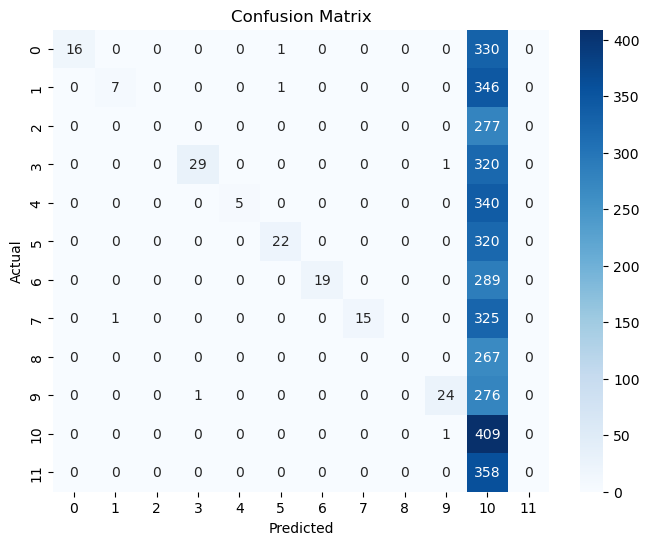

In [51]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [74]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a list to store the results
results = []

# Define different parameter values
parameters = [{"max_depth": None, "random_state": 42},
              {"max_depth": 10, "random_state": 123},
              {"max_depth": 15, "random_state": 456}]

for params in parameters:
    # Step 1: Text Vectorization with Count Vectorizer
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(df3['words_news'])

    # Step 2: Normalization (not required for Decision Trees)
    # No need for normalization when using Decision Trees

    # Step 3: Data Split
    X_train, X_test, y_train, y_test = train_test_split(X, df3['month'], test_size=0.2, random_state=42)

    # Step 4: Model Training (Decision Trees) with different parameters
    classifier = DecisionTreeClassifier(**params)
    classifier.fit(X_train, y_train)

    # Step 5: Model Evaluation
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Append results to the list
    results.append({"Parameters": params, "Accuracy": accuracy, "Classification Report": report})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,Parameters,Accuracy,Classification Report
0,"{'max_depth': None, 'random_state': 42}",0.270093,precision recall f1-score ...
1,"{'max_depth': 10, 'random_state': 123}",0.107983,precision recall f1-score ...
2,"{'max_depth': 15, 'random_state': 456}",0.108256,precision recall f1-score ...


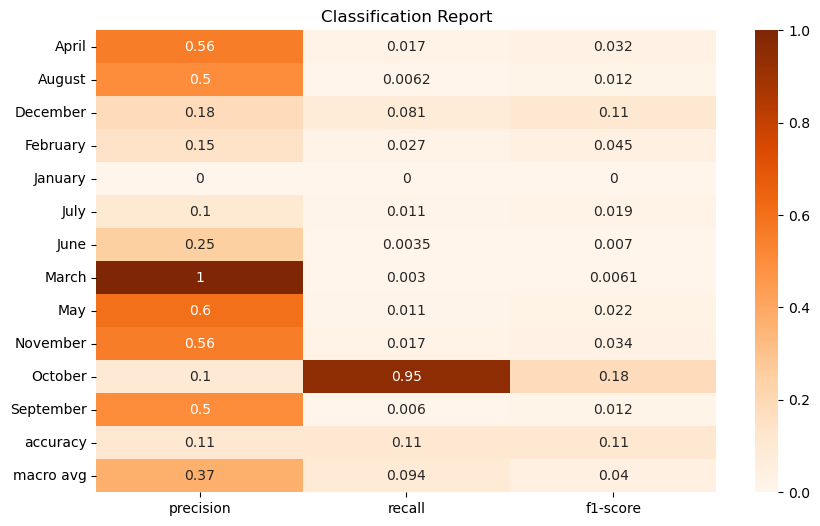

Confusion Matrix:
[[  5   0  10   2   0   1   0   0   0   0 282   0]
 [  1   2  10   5   1   6   1   0   0   0 299   0]
 [  0   0  22   4   1   3   1   0   0   3 238   0]
 [  0   0  11   9   0   0   0   0   0   0 318   0]
 [  0   0   8   4   0   0   0   0   0   0 272   1]
 [  0   0   4   5   0   3   1   0   0   0 266   0]
 [  0   0   4   3   0   4   1   0   1   0 270   0]
 [  2   0  16  11   0   1   0   1   0   0 297   1]
 [  1   0   6   7   1   7   0   0   3   0 243   0]
 [  0   0  11   3   0   0   0   0   0   5 267   0]
 [  0   1  10   6   1   0   0   0   0   0 343   0]
 [  0   1   9   2   0   4   0   0   1   1 312   2]]


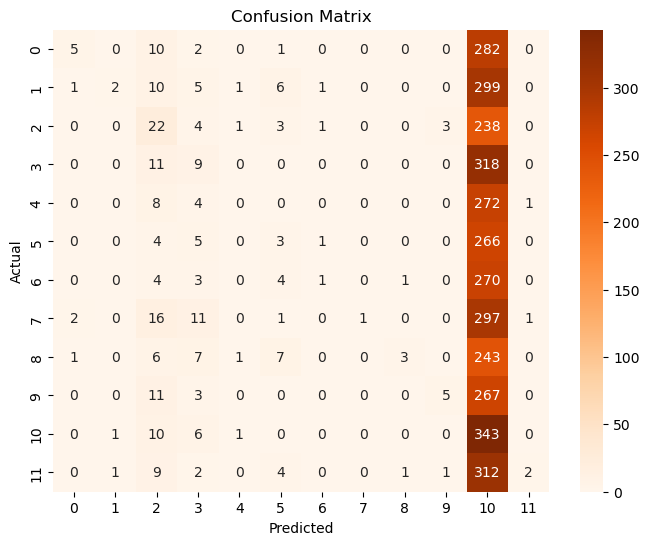

In [75]:
#pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Oranges")
plt.title("Classification Report")
plt.show()

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




The confusion matrix is:
[[  0   2  10   9   0   6   1   3   0   0 269   0]
 [  1   1  10  14   0   8   0   3   1   0 286   1]
 [  2   1  29   5   0   4   0   2   1   6 221   1]
 [  0   1  13  13   1   3   3   3   0   0 301   0]
 [  1   0   6   6   1   2   4   0   1   0 263   1]
 [  0   0   5  11   0   8   2   0   0   0 253   0]
 [  0   1   2   2   0   6   1   4   0   2 264   1]
 [  0   0  14  10   1   4   2   5   1   2 289   1]
 [  0   1   8  10   1  10   0   4   3   0 230   1]
 [  1   0  13   5   1   4   1   0   0   3 258   0]
 [  0   0   8   8   3   5   0   2   0   2 333   0]
 [  1   0   8  11   0  11   2   1   0   3 293   2]]
              precision    recall  f1-score   support

       April       0.00      0.00      0.00       300
      August       0.14      0.00      0.01       325
    December       0.23      0.11      0.15       272
    February       0.12      0.04      0.06       338
     January       0.12      0.00      0.01       285
        July       0.11      0.03   

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


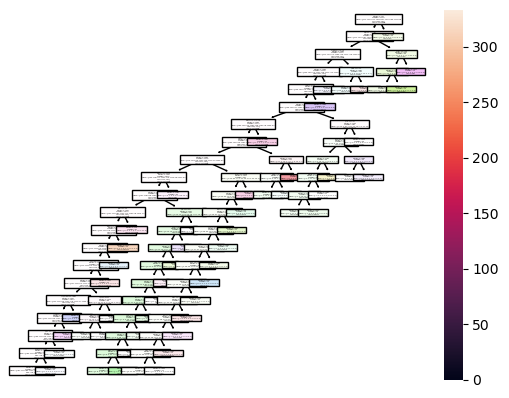

In [92]:
from sklearn import tree 
DT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='random',  ## or "random" or "best"
                            max_depth=20,
                            min_samples_leaf=10)
DT.fit(X_train, y_train)

ypred = DT.predict(X_test)
from sklearn.metrics import confusion_matrix

cnf_matrix2 = confusion_matrix(y_test, ypred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)
ax = sns.heatmap(cnf_matrix2, annot=True, fmt='d' )
ax.xaxis.set_ticklabels(DT.classes_)
ax.yaxis.set_ticklabels(DT.classes_)

print(classification_report(y_test,ypred))

tree.plot_tree(DT,
               feature_names = count_vectorizer.get_feature_names(),
               class_names=['February', 'July', 'May', 'January', 'March', 'October', 'April','August', 'December', 'June', 'September', 'November'],
               filled = True)

plt.savefig("DT1.pdf")

In [90]:
df3['month'].unique()

array(['February', 'July', 'May', 'January', 'March', 'October', 'April',
       'August', 'December', 'June', 'September', 'November'],
      dtype=object)

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a list to store the results
results = []

# Define different parameter values
parameters = [{"max_depth": 5, "random_state": 65},
              {"max_depth": 10, "random_state": 123},
              {"max_depth": 55, "random_state": 456}]

for params in parameters:
    # Step 1: Text Vectorization with Count Vectorizer
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(df4['words_news'])

    # Step 2: Normalization (not required for Decision Trees)
    # No need for normalization when using Decision Trees

    # Step 3: Data Split
    X_train, X_test, y_train, y_test = train_test_split(X, df4['genre'], test_size=0.2, random_state=42)

    # Step 4: Model Training (Decision Trees) with different parameters
    classifier = DecisionTreeClassifier(**params)
    classifier.fit(X_train, y_train)

    # Step 5: Model Evaluation
    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Append results to the list
    results.append({"Parameters": params, "Accuracy": accuracy, "Classification Report": report})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df


C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

,Parameters,Accuracy,Classification Report
0,"{'max_depth': 5, 'random_state': 65}",0.273100,precision recall f1-score...
1,"{'max_depth': 10, 'random_state': 123}",0.272280,precision recall f1-score...
2,"{'max_depth': 55, 'random_state': 456}",0.264352,precision recall f1-score...


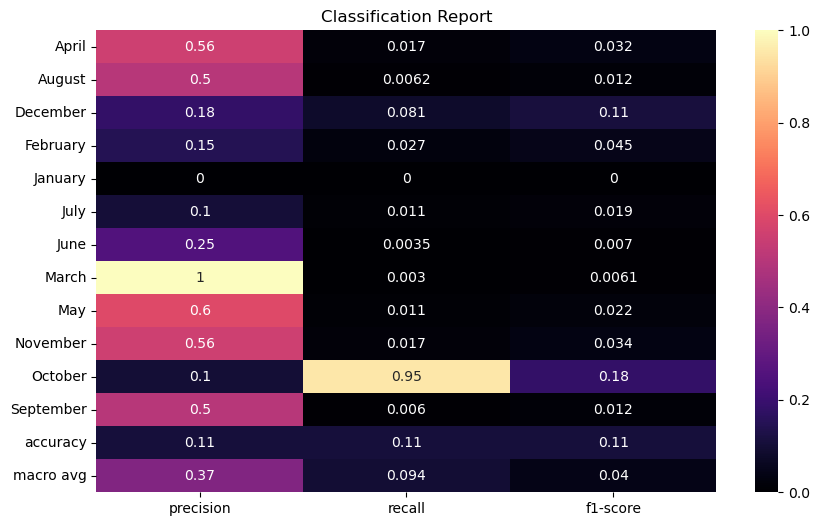

Confusion Matrix:
[[  5   0  10   2   0   1   0   0   0   0 282   0]
 [  1   2  10   5   1   6   1   0   0   0 299   0]
 [  0   0  22   4   1   3   1   0   0   3 238   0]
 [  0   0  11   9   0   0   0   0   0   0 318   0]
 [  0   0   8   4   0   0   0   0   0   0 272   1]
 [  0   0   4   5   0   3   1   0   0   0 266   0]
 [  0   0   4   3   0   4   1   0   1   0 270   0]
 [  2   0  16  11   0   1   0   1   0   0 297   1]
 [  1   0   6   7   1   7   0   0   3   0 243   0]
 [  0   0  11   3   0   0   0   0   0   5 267   0]
 [  0   1  10   6   1   0   0   0   0   0 343   0]
 [  0   1   9   2   0   4   0   0   1   1 312   2]]


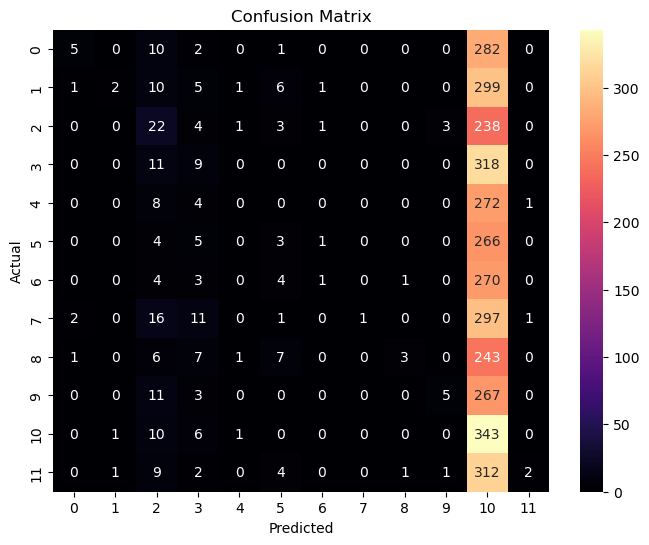

In [93]:
#pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="magma")
plt.title("Classification Report")
plt.show()

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [94]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, classification_report

# Initialize a list to store the results
results = []

# Define different parameter values
parameters = [{"max_depth": 5, "random_state": 65},
              {"max_depth": 10, "random_state": 123},
              {"max_depth": 55, "random_state": 456}]

for params in parameters:
    # Step 1: Text Vectorization with Count Vectorizer
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(df4['words_news'])

    # Step 2: No need for normalization when using Decision Trees

    # Define the Decision Tree classifier with parameters
    classifier = DecisionTreeClassifier(**params)

    # Perform cross-validation to evaluate the model
    scores = cross_val_score(classifier, X, df4['genre'], cv=5, scoring=make_scorer(accuracy_score))

    # Calculate accuracy as the mean of cross-validation scores
    accuracy = scores.mean()

    # Append results to the list
    results.append({"Parameters": params, "Cross-Validation Accuracy": accuracy})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df


,Parameters,Cross-Validation Accuracy
0,"{'max_depth': 5, 'random_state': 65}",0.269714
1,"{'max_depth': 10, 'random_state': 123}",0.269386
2,"{'max_depth': 55, 'random_state': 456}",0.262824


In [95]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Step 1: Text Vectorization with Count Vectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df4['words_news'])

# Step 2: Data Split
X_train, X_test, y_train, y_test = train_test_split(X, df4['genre'], test_size=0.2, random_state=42)

# Step 3: Hyperparameter Tuning (Regularization)
param_grid = {
    'max_depth': [None, 10, 15, 20],  # Vary max_depth for regularization
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 4: Model Training (Decision Trees) with best hyperparameters
classifier = DecisionTreeClassifier(random_state=42, **best_params)
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.2733734281027884
Classification Report:
                  precision    recall  f1-score   support

         Action       0.28      0.96      0.43      1024
      Adventure       0.00      0.00      0.00       196
      Animation       0.00      0.00      0.00       223
      Biography       0.00      0.00      0.00       214
         Comedy       0.33      0.01      0.02       607
          Crime       0.00      0.00      0.00       184
    Documentary       0.00      0.00      0.00        30
          Drama       0.12      0.02      0.04       615
         Family       0.00      0.00      0.00        75
        Fantasy       0.00      0.00      0.00        36
        History       0.00      0.00      0.00         4
         Horror       0.00      0.00      0.00       202
          Music       0.00      0.00      0.00        11
        Mystery       0.00      0.00      0.00        23
    

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



The confusion matrix is:
[[1020    0    0    0    2    0    0    0    0    2    0    0    0    0
     0    0    0    0    0    0]
 [ 194    0    0    0    1    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 223    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 212    0    0    0    0    0    0    1    0    1    0    0    0    0
     0    0    0    0    0    0]
 [ 602    0    0    0    3    0    0    1    0    1    0    0    0    0
     0    0    0    0    0    0]
 [ 183    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  29    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 612    0    0    0    1    0    0    1    0    1    0    0    0    0
     0    0    0    0    0    0]
 [  75    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  36    0    0    0    0   

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\asuri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_featu

                 precision    recall  f1-score   support

         Action       0.28      1.00      0.44      1024
      Adventure       0.00      0.00      0.00       196
      Animation       0.00      0.00      0.00       223
      Biography       0.00      0.00      0.00       214
         Comedy       0.38      0.00      0.01       607
          Crime       0.00      0.00      0.00       184
    Documentary       0.00      0.00      0.00        30
          Drama       0.14      0.00      0.00       615
         Family       0.00      0.00      0.00        75
        Fantasy       0.00      0.00      0.00        36
        History       0.00      0.00      0.00         4
         Horror       0.00      0.00      0.00       202
          Music       0.00      0.00      0.00        11
        Mystery       0.00      0.00      0.00        23
        Romance       0.00      0.00      0.00        31
Science Fiction       0.00      0.00      0.00        63
       TV Movie       0.00    

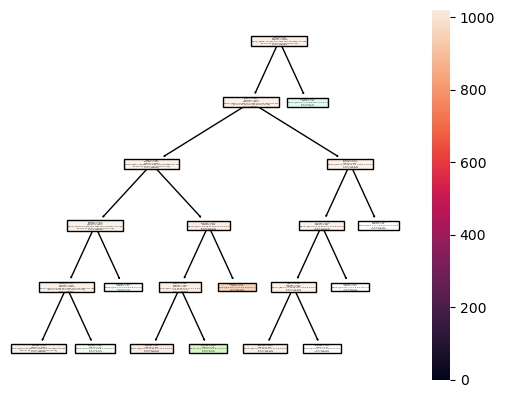

In [96]:
from sklearn import tree 
DT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='random',  ## or "random" or "best"
                            max_depth=5,
                            min_samples_leaf=10)
DT.fit(X_train, y_train)

ypred = DT.predict(X_test)
from sklearn.metrics import confusion_matrix

cnf_matrix2 = confusion_matrix(y_test, ypred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)
ax = sns.heatmap(cnf_matrix2, annot=True, fmt='d' )
ax.xaxis.set_ticklabels(DT.classes_)
ax.yaxis.set_ticklabels(DT.classes_)

print(classification_report(y_test,ypred))

tree.plot_tree(DT,
               feature_names = count_vectorizer.get_feature_names(),
               class_names=['February', 'July', 'May', 'January', 'March', 'October', 'April','August', 'December', 'June', 'September', 'November'],
               filled = True)

plt.savefig("DT2.pdf")